### To do 

gal['data'].shape = 3, npix, npix -> gal['img'], gal['mask'], gal['weight'].   'mask' needs to be boolean.

In [3]:
import matplotlib as mpl
import numpy as np
from glob import glob
import matplotlib.pyplot as plt 
import pickle

import astrobf
from astrobf.utils import mask_utils
from astrobf.utils.mask_utils import *
from astrobf.utils import gen_mask
from astrobf.morph import measure_morph

#import statmorph
import time

from ax.utils.notebook.plotting import render, init_notebook_plotting

### Prototype-related functions

In [4]:
mpl.rcParams['savefig.facecolor'] = 'white'

In [ ]:
class DataSet():
    
    def __init__(self, wdir="", sort=True):
        self.wdir = wdir
        self.all_imgs = None
        self.catalog = None
        self.morph_results = None
        self._gids = None
        self._sort_gids = sort
        
    def load_all_image(self, fn):
        self.all_imgs = pickle.load(open(fn, "rb"))
        if self._sort_gids:
            get_gid = lambda x : x['img_name']
            all_imgs.sort(key=get_gid)
            self.all_imgs = all_imgs
        self.add_gids()

    def add_gids(self):
        """
        will be used to keep different data in sync.
        """
        self._gids = np.array([gal['img_name'] for gal in self.all_imgs])
        
    def load_catalog(self, fn):
        """
        ensure the same order as self._gids
        """
        from astrobf.utils.misc import load_Nair
        self.catalog = load_Nair(fn)
        
    def 

In [31]:
import random

In [32]:
random.shuffle(all_gals)

In [33]:
all_gals

[{'data': array([[[ -1.15533574e-02,  -6.31309766e-03,  -1.32016102e-02, ...,
             5.46769518e-03,   6.54454867e-04,   1.24112507e-02],
          [  1.03013227e-02,   2.40179244e-02,  -5.30824112e-03, ...,
            -2.96255909e-02,  -3.20402384e-02,  -4.45312224e-02],
          [  3.63595672e-02,  -1.89688224e-02,  -4.44027148e-02, ...,
            -3.00558973e-02,  -9.67842340e-03,   2.35989057e-02],
          ..., 
          [  3.09830308e-02,  -2.81989276e-02,  -2.20685434e-02, ...,
             4.56394348e-03,   4.60721701e-02,   1.93773268e-03],
          [  3.22222188e-02,  -1.60888559e-03,  -2.12960690e-02, ...,
            -1.27161602e-02,   7.53149018e-02,   5.30695589e-03],
          [ -4.08626609e-02,  -3.81735060e-03,   4.81495038e-02, ...,
            -6.44972024e-04,   2.00089589e-02,  -9.87075455e-03]],
  
         [[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
          [  0.00000

In [38]:
sorted_ag = sort_list_by(all_gals, gids)
# NO, it's not what I wanted...! 

In [40]:
gids

array(['J000007.81m000226.09', 'J000047.89p141639.09',
       'J000133.95p150453.64', ..., 'J235743.74p003918.61',
       'J235744.10m001029.94', 'J235929.61p161009.65'],
      dtype='<U20')

In [39]:
sorted_ag

[{'data': array([[[ -1.15533574e-02,  -6.31309766e-03,  -1.32016102e-02, ...,
             5.46769518e-03,   6.54454867e-04,   1.24112507e-02],
          [  1.03013227e-02,   2.40179244e-02,  -5.30824112e-03, ...,
            -2.96255909e-02,  -3.20402384e-02,  -4.45312224e-02],
          [  3.63595672e-02,  -1.89688224e-02,  -4.44027148e-02, ...,
            -3.00558973e-02,  -9.67842340e-03,   2.35989057e-02],
          ..., 
          [  3.09830308e-02,  -2.81989276e-02,  -2.20685434e-02, ...,
             4.56394348e-03,   4.60721701e-02,   1.93773268e-03],
          [  3.22222188e-02,  -1.60888559e-03,  -2.12960690e-02, ...,
            -1.27161602e-02,   7.53149018e-02,   5.30695589e-03],
          [ -4.08626609e-02,  -3.81735060e-03,   4.81495038e-02, ...,
            -6.44972024e-04,   2.00089589e-02,  -9.87075455e-03]],
  
         [[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
          [  0.00000

In [25]:
gids = np.array([gal['img_name'] for gal in all_gals])

list 안의 값을 봐야돼서 좀 애매함.... 

In [37]:
# sort one or more lists by the list Y. 
def sort_list_by(lists, target, key_fun=lambda x : x):
    """
    parameters
    ----------
    lsits: list or lists 
    
    target:
        iterable with the same length as lists.
    """
    return [x for _, x in sorted(zip(target, lists), key=lambda pair: pair[0])]


In [26]:
gids

array(['J000007.81m000226.09', 'J000047.89p141639.09',
       'J000133.95p150453.64', ..., 'J235743.74p003918.61',
       'J235744.10m001029.94', 'J235929.61p161009.65'],
      dtype='<U20')

### 1. Load the all-in-one data

In [20]:
fn = "../../bf_data/Nair_and_Abraham_2010/all_gals.pickle"
all_gals = pickle.load(open(fn, "rb"))

all_gals = all_gals[1:] # Why the first galaxy image is NaN?

### Issue: TMO is dependent on the absolute value of a image 

Use fraction rather than absolute value??  
Or, set a *global* constraint? (maybe it makes sense bc values in all images are consistent in physical meaning)

### 2. Load galaxy catalog data and initial morph measurements

Just in case, only for the initial morphology measurement, full results are saved. 

In [15]:
from astrobf.utils.misc import load_Nair
cat = load_Nair('../../bf_data/Nair_and_Abraham_2010/catalog/table2.dat')

                         ID      RA    dec  zred  zred_q     mg     mr  Mag_r  \
0      J155341.74-003422.84  238.42  -0.57  0.07    1.00  15.82  15.05 -22.08   
1      J155146.83-000618.62  237.94  -0.10  0.05    1.00  15.51  14.60 -21.56   
2      J154453.22+002415.48  236.22   0.40  0.03    1.00  15.63  14.83 -20.27   
3      J154711.32+002424.81  236.79   0.40  0.03    0.96  15.71  15.15 -20.10   
4      J154514.39+004619.89  236.31   0.77  0.01    1.00  15.34  14.95 -18.38   
...                     ...     ...    ...   ...     ...    ...    ...    ...   
14029  J124719.07+154235.64  191.83  15.71  0.06    1.00  15.78  14.90 -21.85   
14030  J130510.16+152606.67  196.29  15.43  0.05    1.00  15.31  14.59 -21.62   
14031  J131525.21+152522.23  198.85  15.42  0.02    1.00  15.25  14.34 -20.14   
14032  J132045.57+151532.75  200.19  15.26  0.02    0.99  15.72  14.93 -19.32   
14033  J132135.96+151917.80  200.40  15.32  0.02    1.00  15.47  14.80 -19.47   

       logLg  Rpetro   Rp50

### All_gals data

all-gals is a list of dictionaries, each of which contains 
(ndarray image, string image_name, and slices slice)


In [5]:
if False:
    all_morphs = glob("../../bf_data/Nair_and_Abraham_2010/BriAda/Morphs/*.pickle")

    good_gids = np.array([gal['img_name'] for gal in all_gals])
    result_arr = measure_morph.load_initial_morph(all_morphs, good_gids)
    # Pickle result_arr
    pickle.dump(result_arr, open("morph_init_result.pickle", "wb"))
else:
    result_arr = pickle.load(open("morph_init_result.pickle", "rb"))

print(len(result_arr))


9537


# Initialize BO loop -  Measure morphology features

### Initial guesses 


In [8]:
fields = ['gini', 'm20']#, 'concentration', 'asymmetry', 'smoothness']

from astrobf.run.Full_exp import *
from astrobf.analysis.binary_clustering import *
from astrobf.analysis.utils import *

# Run Bayesian Optimization loop

In [9]:
from ax.plot.contour import plot_contour
from ax.plot.trace import optimization_trace_single_method
from ax.service.ax_client import AxClient
#from ax.utils.notebook.plotting import render, init_notebook_plotting
#init_notebook_plotting()

### define evaluation function
1. Measure Morphological parameters 
2. cluster/classify 
3. assess clustering/classification


In [272]:
import importlib

In [273]:
importlib.reload(custom_morph)

<module 'astrobf.morph.custom_morph' from '/home/hoseung/Work/tonemap/astroBF/astrobf/morph/custom_morph.py'>

In [10]:
from astrobf.morph import custom_morph
#labeler = lambda results : np.array((results['ttype'] >= 0) * (results['ttype'] < 4), dtype=int)
def labeler(results):
    labels = np.zeros(len(results), dtype=int)
    labels[results['ttype']< 0] = 0
    labels[(results['ttype'] >= 0) * (results['ttype'] < 3)] = 1
    labels[(results['ttype'] >= 3) * (results['ttype'] < 7)] = 2
    labels[results['ttype'] >= 7] = 3
    return labels

def evaluate(params, cluster_method="agglo"):
    result_arr = custom_morph.step_simple_morph(all_gals, params)
    if result_arr[0] == "bad":
        #print(result_arr)
        return {"mymetric": (-1, 0), "total_flux":(result_arr[1],0)}
    add_ttype(result_arr, cat)
    eval_metrics = do_ML(result_arr, labeler, n_clusters=4, fields=['gini', 'm20'], cluster_method='ward')
    # save all metrics to a global list.
    all_metrics.append(eval_metrics)
    mymetric = eval_metrics[0][1] # Homogenity
    stderr = 0.0
    return {"mymetric": (mymetric, stderr), "total_flux":(1,0)}

In [11]:
axc = AxClient()
# 0.45x is the lowest value of maximum flux of all images.
axc.create_experiment(
    parameters=[
        {"name": "b",
        "type": "range",
        "bounds": [1.0, 7.0],
        "value_type": "float",  # Optional, defaults to inference from type of "bounds".
        "log_scale": False},
        {"name": "c",
        "type": "range",
        "bounds": [0.5, 10.0]},
        {"name": "dl",
        "type": "range",
        "bounds": [0.5, 8.0]},
        {"name": "dh",
        "type": "range",
        "bounds": [0.2, 8.0]},
    ],
    objective_name="mymetric",
    #minimize=True,  # Optional, defaults to False. Maximize Shiloutte score
    parameter_constraints=["b - dl <= 100"], # all images are stretched to 100
    overwrite_existing_experiment =True,
    outcome_constraints=["total_flux >= 1e-5"],  # Optional.
)

[INFO 05-05 15:12:08] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 2 decimal points.
[INFO 05-05 15:12:08] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter c. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 05-05 15:12:08] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter dl. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 05-05 15:12:08] ax.service.utils.instantiation: Inferred value type of ParameterType.FLOAT for parameter dh. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 05-05 15:12:08] ax.modelbridge.

In [47]:
all_metrics=[]
for i in range(100):
    parameters, trial_index = axc.get_next_trial()
    
    axc.complete_trial(trial_index=trial_index, raw_data=evaluate(parameters))


[INFO 04-23 13:34:47] ax.service.ax_client: Generated new trial 0 with parameters {'b': 2.96, 'c': 0.98, 'dl': 3.36, 'dh': 7.39}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:35:02] ax.service.ax_client: Completed trial 0 with data: {'mymetric': (0.27000000000000002, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:35:02] ax.service.ax_client: Generated new trial 1 with parameters {'b': 4.18, 'c': 7.45, 'dl': 3.76, 'dh': 0.57}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:35:15] ax.service.ax_client: Completed trial 1 with data: {'mymetric': (0.28999999999999998, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:35:15] ax.service.ax_client: Generated new trial 2 with parameters {'b': 2.15, 'c': 1.37, 'dl': 0.67, 'dh': 7.27}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:35:27] ax.service.ax_client: Completed trial 2 with data: {'mymetric': (0.11, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:35:27] ax.service.ax_client: Generated new trial 3 with parameters {'b': 3.1, 'c': 8.99, 'dl': 5.98, 'dh': 2.64}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:35:42] ax.service.ax_client: Completed trial 3 with data: {'mymetric': (0.12, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:35:42] ax.service.ax_client: Generated new trial 4 with parameters {'b': 5.0, 'c': 1.68, 'dl': 0.79, 'dh': 4.5}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

[INFO 04-23 13:35:42] ax.service.ax_client: Completed trial 4 with data: {'mymetric': (-1, 0), 'total_flux': (0.0, 0)}.
[INFO 04-23 13:35:43] ax.service.ax_client: Generated new trial 5 with parameters {'b': 1.39, 'c': 0.83, 'dl': 4.13, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:35:58] ax.service.ax_client: Completed trial 5 with data: {'mymetric': (0.17999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:35:59] ax.service.ax_client: Generated new trial 6 with parameters {'b': 4.4, 'c': 10.0, 'dl': 4.67, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:36:14] ax.service.ax_client: Completed trial 6 with data: {'mymetric': (0.23999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:36:14] ax.service.ax_client: Generated new trial 7 with parameters {'b': 2.43, 'c': 8.29, 'dl': 4.44, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:36:30] ax.service.ax_client: Completed trial 7 with data: {'mymetric': (0.20000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:36:31] ax.service.ax_client: Generated new trial 8 with parameters {'b': 4.64, 'c': 7.05, 'dl': 6.36, 'dh': 0.34}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:36:46] ax.service.ax_client: Completed trial 8 with data: {'mymetric': (0.14999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:36:47] ax.service.ax_client: Generated new trial 9 with parameters {'b': 3.7, 'c': 10.0, 'dl': 2.49, 'dh': 1.22}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:36:59] ax.service.ax_client: Completed trial 9 with data: {'mymetric': (0.17999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:36:59] ax.service.ax_client: Generated new trial 10 with parameters {'b': 3.33, 'c': 3.3, 'dl': 4.04, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:37:15] ax.service.ax_client: Completed trial 10 with data: {'mymetric': (0.23000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:37:15] ax.service.ax_client: Generated new trial 11 with parameters {'b': 3.96, 'c': 0.5, 'dl': 5.54, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:37:31] ax.service.ax_client: Completed trial 11 with data: {'mymetric': (0.20000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:37:31] ax.service.ax_client: Generated new trial 12 with parameters {'b': 3.53, 'c': 0.5, 'dl': 2.48, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:37:44] ax.service.ax_client: Completed trial 12 with data: {'mymetric': (0.23000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:37:44] ax.service.ax_client: Generated new trial 13 with parameters {'b': 5.11, 'c': 8.2, 'dl': 1.5, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

[INFO 04-23 13:37:44] ax.service.ax_client: Completed trial 13 with data: {'mymetric': (-1, 0), 'total_flux': (0.0, 0)}.
[INFO 04-23 13:37:45] ax.service.ax_client: Generated new trial 14 with parameters {'b': 3.57, 'c': 7.83, 'dl': 4.16, 'dh': 0.75}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:38:01] ax.service.ax_client: Completed trial 14 with data: {'mymetric': (0.25, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:38:02] ax.service.ax_client: Generated new trial 15 with parameters {'b': 2.49, 'c': 10.0, 'dl': 3.1, 'dh': 3.09}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:38:17] ax.service.ax_client: Completed trial 15 with data: {'mymetric': (0.20999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:38:18] ax.service.ax_client: Generated new trial 16 with parameters {'b': 4.65, 'c': 6.74, 'dl': 4.78, 'dh': 4.19}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:38:33] ax.service.ax_client: Completed trial 16 with data: {'mymetric': (0.23999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:38:34] ax.service.ax_client: Generated new trial 17 with parameters {'b': 3.82, 'c': 1.23, 'dl': 4.65, 'dh': 2.91}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:38:49] ax.service.ax_client: Completed trial 17 with data: {'mymetric': (0.23999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:38:50] ax.service.ax_client: Generated new trial 18 with parameters {'b': 4.01, 'c': 7.45, 'dl': 4.2, 'dh': 3.53}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:39:05] ax.service.ax_client: Completed trial 18 with data: {'mymetric': (0.28000000000000003, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:39:06] ax.service.ax_client: Generated new trial 19 with parameters {'b': 2.51, 'c': 2.36, 'dl': 2.84, 'dh': 1.3}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:39:21] ax.service.ax_client: Completed trial 19 with data: {'mymetric': (0.27000000000000002, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:39:22] ax.service.ax_client: Generated new trial 20 with parameters {'b': 1.26, 'c': 3.28, 'dl': 3.31, 'dh': 0.43}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:39:37] ax.service.ax_client: Completed trial 20 with data: {'mymetric': (0.20999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:39:38] ax.service.ax_client: Generated new trial 21 with parameters {'b': 3.25, 'c': 4.96, 'dl': 3.02, 'dh': 3.77}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:39:52] ax.service.ax_client: Completed trial 21 with data: {'mymetric': (0.25, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:39:53] ax.service.ax_client: Generated new trial 22 with parameters {'b': 2.02, 'c': 0.5, 'dl': 4.71, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:40:09] ax.service.ax_client: Completed trial 22 with data: {'mymetric': (0.14999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:40:10] ax.service.ax_client: Generated new trial 23 with parameters {'b': 1.93, 'c': 0.5, 'dl': 2.58, 'dh': 5.61}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:40:25] ax.service.ax_client: Completed trial 23 with data: {'mymetric': (0.23000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:40:26] ax.service.ax_client: Generated new trial 24 with parameters {'b': 1.95, 'c': 7.88, 'dl': 1.72, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:40:40] ax.service.ax_client: Completed trial 24 with data: {'mymetric': (0.23000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:40:41] ax.service.ax_client: Generated new trial 25 with parameters {'b': 4.23, 'c': 5.18, 'dl': 4.51, 'dh': 0.25}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:40:55] ax.service.ax_client: Completed trial 25 with data: {'mymetric': (0.25, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:40:56] ax.service.ax_client: Generated new trial 26 with parameters {'b': 1.0, 'c': 10.0, 'dl': 2.35, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:41:12] ax.service.ax_client: Completed trial 26 with data: {'mymetric': (0.19, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:41:13] ax.service.ax_client: Generated new trial 27 with parameters {'b': 1.0, 'c': 10.0, 'dl': 4.99, 'dh': 4.22}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:41:29] ax.service.ax_client: Completed trial 27 with data: {'mymetric': (0.19, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:41:30] ax.service.ax_client: Generated new trial 28 with parameters {'b': 1.0, 'c': 0.5, 'dl': 1.03, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:41:44] ax.service.ax_client: Completed trial 28 with data: {'mymetric': (0.23000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:41:45] ax.service.ax_client: Generated new trial 29 with parameters {'b': 1.0, 'c': 10.0, 'dl': 0.5, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:41:59] ax.service.ax_client: Completed trial 29 with data: {'mymetric': (0.23999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:42:00] ax.service.ax_client: Generated new trial 30 with parameters {'b': 1.0, 'c': 10.0, 'dl': 2.05, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:42:15] ax.service.ax_client: Completed trial 30 with data: {'mymetric': (0.17999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:42:16] ax.service.ax_client: Generated new trial 31 with parameters {'b': 3.96, 'c': 0.5, 'dl': 3.86, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:42:31] ax.service.ax_client: Completed trial 31 with data: {'mymetric': (0.26000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:42:32] ax.service.ax_client: Generated new trial 32 with parameters {'b': 5.71, 'c': 10.0, 'dl': 7.3, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:42:47] ax.service.ax_client: Completed trial 32 with data: {'mymetric': (0.16, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:42:48] ax.service.ax_client: Generated new trial 33 with parameters {'b': 1.0, 'c': 10.0, 'dl': 8.0, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:43:03] ax.service.ax_client: Completed trial 33 with data: {'mymetric': (0.22, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:43:04] ax.service.ax_client: Generated new trial 34 with parameters {'b': 1.0, 'c': 10.0, 'dl': 8.0, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:43:19] ax.service.ax_client: Completed trial 34 with data: {'mymetric': (0.16, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:43:20] ax.service.ax_client: Generated new trial 35 with parameters {'b': 1.83, 'c': 0.5, 'dl': 8.0, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:43:36] ax.service.ax_client: Completed trial 35 with data: {'mymetric': (0.11, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:43:37] ax.service.ax_client: Generated new trial 36 with parameters {'b': 6.8, 'c': 0.5, 'dl': 8.0, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:43:52] ax.service.ax_client: Completed trial 36 with data: {'mymetric': (0.23000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:43:53] ax.service.ax_client: Generated new trial 37 with parameters {'b': 7.0, 'c': 0.5, 'dl': 7.0, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:44:07] ax.service.ax_client: Completed trial 37 with data: {'mymetric': (0.28000000000000003, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:44:08] ax.service.ax_client: Generated new trial 38 with parameters {'b': 6.16, 'c': 0.5, 'dl': 6.48, 'dh': 4.69}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:44:24] ax.service.ax_client: Completed trial 38 with data: {'mymetric': (0.23000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:44:24] ax.service.ax_client: Generated new trial 39 with parameters {'b': 6.5, 'c': 0.5, 'dl': 8.0, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:44:40] ax.service.ax_client: Completed trial 39 with data: {'mymetric': (0.20000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:44:41] ax.service.ax_client: Generated new trial 40 with parameters {'b': 7.0, 'c': 9.55, 'dl': 6.85, 'dh': 3.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:44:54] ax.service.ax_client: Completed trial 40 with data: {'mymetric': (0.23000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:44:55] ax.service.ax_client: Generated new trial 41 with parameters {'b': 7.0, 'c': 0.5, 'dl': 6.45, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:45:08] ax.service.ax_client: Completed trial 41 with data: {'mymetric': (0.29999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:45:09] ax.service.ax_client: Generated new trial 42 with parameters {'b': 7.0, 'c': 0.5, 'dl': 5.7, 'dh': 6.34}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:45:21] ax.service.ax_client: Completed trial 42 with data: {'mymetric': (0.14999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:45:22] ax.service.ax_client: Generated new trial 43 with parameters {'b': 7.0, 'c': 0.5, 'dl': 7.01, 'dh': 2.4}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:45:36] ax.service.ax_client: Completed trial 43 with data: {'mymetric': (0.26000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:45:37] ax.service.ax_client: Generated new trial 44 with parameters {'b': 6.42, 'c': 5.04, 'dl': 6.45, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:45:52] ax.service.ax_client: Completed trial 44 with data: {'mymetric': (0.25, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:45:53] ax.service.ax_client: Generated new trial 45 with parameters {'b': 7.0, 'c': 10.0, 'dl': 8.0, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:46:09] ax.service.ax_client: Completed trial 45 with data: {'mymetric': (0.23999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:46:10] ax.service.ax_client: Generated new trial 46 with parameters {'b': 1.0, 'c': 10.0, 'dl': 0.5, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:46:23] ax.service.ax_client: Completed trial 46 with data: {'mymetric': (0.23999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:46:24] ax.service.ax_client: Generated new trial 47 with parameters {'b': 3.52, 'c': 0.5, 'dl': 3.38, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:46:38] ax.service.ax_client: Completed trial 47 with data: {'mymetric': (0.23000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:46:39] ax.service.ax_client: Generated new trial 48 with parameters {'b': 3.84, 'c': 10.0, 'dl': 3.57, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:46:52] ax.service.ax_client: Completed trial 48 with data: {'mymetric': (0.25, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:46:54] ax.service.ax_client: Generated new trial 49 with parameters {'b': 1.0, 'c': 10.0, 'dl': 6.57, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:47:09] ax.service.ax_client: Completed trial 49 with data: {'mymetric': (0.19, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:47:10] ax.service.ax_client: Generated new trial 50 with parameters {'b': 5.37, 'c': 0.5, 'dl': 8.0, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:47:25] ax.service.ax_client: Completed trial 50 with data: {'mymetric': (0.13, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:47:27] ax.service.ax_client: Generated new trial 51 with parameters {'b': 1.0, 'c': 0.5, 'dl': 0.5, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:47:40] ax.service.ax_client: Completed trial 51 with data: {'mymetric': (0.23999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:47:41] ax.service.ax_client: Generated new trial 52 with parameters {'b': 3.77, 'c': 10.0, 'dl': 8.0, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:47:56] ax.service.ax_client: Completed trial 52 with data: {'mymetric': (0.12, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:47:58] ax.service.ax_client: Generated new trial 53 with parameters {'b': 7.0, 'c': 10.0, 'dl': 8.0, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:48:13] ax.service.ax_client: Completed trial 53 with data: {'mymetric': (0.23999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:48:14] ax.service.ax_client: Generated new trial 54 with parameters {'b': 2.81, 'c': 0.5, 'dl': 2.45, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:48:28] ax.service.ax_client: Completed trial 54 with data: {'mymetric': (0.23999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:48:30] ax.service.ax_client: Generated new trial 55 with parameters {'b': 5.6, 'c': 0.5, 'dl': 5.63, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:48:44] ax.service.ax_client: Completed trial 55 with data: {'mymetric': (0.26000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:48:45] ax.service.ax_client: Generated new trial 56 with parameters {'b': 5.19, 'c': 0.5, 'dl': 5.74, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:49:00] ax.service.ax_client: Completed trial 56 with data: {'mymetric': (0.23999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:49:01] ax.service.ax_client: Generated new trial 57 with parameters {'b': 6.65, 'c': 0.5, 'dl': 6.11, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:49:14] ax.service.ax_client: Completed trial 57 with data: {'mymetric': (0.28999999999999998, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:49:16] ax.service.ax_client: Generated new trial 58 with parameters {'b': 4.13, 'c': 10.0, 'dl': 3.62, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:49:28] ax.service.ax_client: Completed trial 58 with data: {'mymetric': (0.22, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:49:29] ax.service.ax_client: Generated new trial 59 with parameters {'b': 1.0, 'c': 0.5, 'dl': 1.7, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:49:45] ax.service.ax_client: Completed trial 59 with data: {'mymetric': (0.22, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:49:46] ax.service.ax_client: Generated new trial 60 with parameters {'b': 5.77, 'c': 10.0, 'dl': 5.34, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:49:59] ax.service.ax_client: Completed trial 60 with data: {'mymetric': (0.22, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:50:00] ax.service.ax_client: Generated new trial 61 with parameters {'b': 7.0, 'c': 2.7, 'dl': 6.07, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:50:12] ax.service.ax_client: Completed trial 61 with data: {'mymetric': (0.27000000000000002, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:50:14] ax.service.ax_client: Generated new trial 62 with parameters {'b': 2.52, 'c': 0.5, 'dl': 2.08, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:50:28] ax.service.ax_client: Completed trial 62 with data: {'mymetric': (0.23000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:50:29] ax.service.ax_client: Generated new trial 63 with parameters {'b': 5.21, 'c': 10.0, 'dl': 5.6, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:50:44] ax.service.ax_client: Completed trial 63 with data: {'mymetric': (0.23000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:50:45] ax.service.ax_client: Generated new trial 64 with parameters {'b': 4.07, 'c': 4.26, 'dl': 3.78, 'dh': 2.94}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:50:59] ax.service.ax_client: Completed trial 64 with data: {'mymetric': (0.23000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:51:00] ax.service.ax_client: Generated new trial 65 with parameters {'b': 2.82, 'c': 10.0, 'dl': 2.18, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:51:13] ax.service.ax_client: Completed trial 65 with data: {'mymetric': (0.26000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:51:14] ax.service.ax_client: Generated new trial 66 with parameters {'b': 4.39, 'c': 10.0, 'dl': 3.99, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:51:27] ax.service.ax_client: Completed trial 66 with data: {'mymetric': (0.23000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:51:29] ax.service.ax_client: Generated new trial 67 with parameters {'b': 1.0, 'c': 5.18, 'dl': 0.5, 'dh': 3.78}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:51:42] ax.service.ax_client: Completed trial 67 with data: {'mymetric': (0.28999999999999998, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:51:43] ax.service.ax_client: Generated new trial 68 with parameters {'b': 2.1, 'c': 10.0, 'dl': 8.0, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:51:59] ax.service.ax_client: Completed trial 68 with data: {'mymetric': (0.14999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:52:00] ax.service.ax_client: Generated new trial 69 with parameters {'b': 7.0, 'c': 4.63, 'dl': 7.47, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:52:15] ax.service.ax_client: Completed trial 69 with data: {'mymetric': (0.23999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:52:16] ax.service.ax_client: Generated new trial 70 with parameters {'b': 1.0, 'c': 0.5, 'dl': 7.09, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:52:33] ax.service.ax_client: Completed trial 70 with data: {'mymetric': (0.16, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:52:34] ax.service.ax_client: Generated new trial 71 with parameters {'b': 2.68, 'c': 10.0, 'dl': 1.82, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:52:47] ax.service.ax_client: Completed trial 71 with data: {'mymetric': (0.23999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:52:49] ax.service.ax_client: Generated new trial 72 with parameters {'b': 6.67, 'c': 0.5, 'dl': 6.52, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:53:02] ax.service.ax_client: Completed trial 72 with data: {'mymetric': (0.25, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:53:04] ax.service.ax_client: Generated new trial 73 with parameters {'b': 6.37, 'c': 0.5, 'dl': 5.61, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:53:16] ax.service.ax_client: Completed trial 73 with data: {'mymetric': (0.27000000000000002, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:53:18] ax.service.ax_client: Generated new trial 74 with parameters {'b': 5.73, 'c': 5.58, 'dl': 5.89, 'dh': 2.37}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:53:33] ax.service.ax_client: Completed trial 74 with data: {'mymetric': (0.25, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:53:35] ax.service.ax_client: Generated new trial 75 with parameters {'b': 6.07, 'c': 10.0, 'dl': 6.39, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:53:50] ax.service.ax_client: Completed trial 75 with data: {'mymetric': (0.23999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:53:52] ax.service.ax_client: Generated new trial 76 with parameters {'b': 1.0, 'c': 5.74, 'dl': 1.07, 'dh': 6.18}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:54:06] ax.service.ax_client: Completed trial 76 with data: {'mymetric': (0.27000000000000002, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:54:08] ax.service.ax_client: Generated new trial 77 with parameters {'b': 7.0, 'c': 0.5, 'dl': 6.13, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:54:20] ax.service.ax_client: Completed trial 77 with data: {'mymetric': (0.20000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:54:22] ax.service.ax_client: Generated new trial 78 with parameters {'b': 6.67, 'c': 6.01, 'dl': 6.0, 'dh': 2.55}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:54:35] ax.service.ax_client: Completed trial 78 with data: {'mymetric': (0.28999999999999998, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:54:37] ax.service.ax_client: Generated new trial 79 with parameters {'b': 7.0, 'c': 4.07, 'dl': 6.49, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:54:50] ax.service.ax_client: Completed trial 79 with data: {'mymetric': (0.29999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:54:52] ax.service.ax_client: Generated new trial 80 with parameters {'b': 6.41, 'c': 2.36, 'dl': 6.0, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:55:05] ax.service.ax_client: Completed trial 80 with data: {'mymetric': (0.28999999999999998, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:55:07] ax.service.ax_client: Generated new trial 81 with parameters {'b': 7.0, 'c': 10.0, 'dl': 5.65, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:55:19] ax.service.ax_client: Completed trial 81 with data: {'mymetric': (0.13, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:55:21] ax.service.ax_client: Generated new trial 82 with parameters {'b': 6.7, 'c': 2.96, 'dl': 6.21, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:55:34] ax.service.ax_client: Completed trial 82 with data: {'mymetric': (0.31, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:55:36] ax.service.ax_client: Generated new trial 83 with parameters {'b': 6.14, 'c': 0.5, 'dl': 5.71, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:55:49] ax.service.ax_client: Completed trial 83 with data: {'mymetric': (0.20999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:55:51] ax.service.ax_client: Generated new trial 84 with parameters {'b': 1.6, 'c': 10.0, 'dl': 3.77, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:56:07] ax.service.ax_client: Completed trial 84 with data: {'mymetric': (0.16, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:56:09] ax.service.ax_client: Generated new trial 85 with parameters {'b': 7.0, 'c': 2.61, 'dl': 6.48, 'dh': 5.9}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:56:22] ax.service.ax_client: Completed trial 85 with data: {'mymetric': (0.20999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:56:25] ax.service.ax_client: Generated new trial 86 with parameters {'b': 6.42, 'c': 5.66, 'dl': 6.28, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:56:39] ax.service.ax_client: Completed trial 86 with data: {'mymetric': (0.26000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:56:41] ax.service.ax_client: Generated new trial 87 with parameters {'b': 5.17, 'c': 5.2, 'dl': 5.4, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:56:56] ax.service.ax_client: Completed trial 87 with data: {'mymetric': (0.25, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:56:58] ax.service.ax_client: Generated new trial 88 with parameters {'b': 1.45, 'c': 6.85, 'dl': 0.6, 'dh': 2.36}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:57:10] ax.service.ax_client: Completed trial 88 with data: {'mymetric': (0.25, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:57:12] ax.service.ax_client: Generated new trial 89 with parameters {'b': 2.8, 'c': 0.5, 'dl': 3.83, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:57:28] ax.service.ax_client: Completed trial 89 with data: {'mymetric': (0.23000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:57:30] ax.service.ax_client: Generated new trial 90 with parameters {'b': 1.77, 'c': 10.0, 'dl': 6.08, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:57:46] ax.service.ax_client: Completed trial 90 with data: {'mymetric': (0.17000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:57:48] ax.service.ax_client: Generated new trial 91 with parameters {'b': 6.6, 'c': 2.29, 'dl': 6.0, 'dh': 4.85}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:58:01] ax.service.ax_client: Completed trial 91 with data: {'mymetric': (0.28999999999999998, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:58:03] ax.service.ax_client: Generated new trial 92 with parameters {'b': 1.0, 'c': 0.5, 'dl': 5.71, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:58:19] ax.service.ax_client: Completed trial 92 with data: {'mymetric': (0.16, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:58:21] ax.service.ax_client: Generated new trial 93 with parameters {'b': 4.08, 'c': 10.0, 'dl': 5.09, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:58:36] ax.service.ax_client: Completed trial 93 with data: {'mymetric': (0.20000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:58:38] ax.service.ax_client: Generated new trial 94 with parameters {'b': 1.69, 'c': 10.0, 'dl': 1.58, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:58:53] ax.service.ax_client: Completed trial 94 with data: {'mymetric': (0.28999999999999998, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:58:55] ax.service.ax_client: Generated new trial 95 with parameters {'b': 1.97, 'c': 10.0, 'dl': 2.22, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:59:10] ax.service.ax_client: Completed trial 95 with data: {'mymetric': (0.26000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:59:12] ax.service.ax_client: Generated new trial 96 with parameters {'b': 1.57, 'c': 5.63, 'dl': 1.77, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:59:27] ax.service.ax_client: Completed trial 96 with data: {'mymetric': (0.26000000000000001, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:59:29] ax.service.ax_client: Generated new trial 97 with parameters {'b': 4.59, 'c': 0.5, 'dl': 4.77, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:59:44] ax.service.ax_client: Completed trial 97 with data: {'mymetric': (0.27000000000000002, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 13:59:46] ax.service.ax_client: Generated new trial 98 with parameters {'b': 6.73, 'c': 3.87, 'dl': 6.06, 'dh': 0.2}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 13:59:59] ax.service.ax_client: Completed trial 98 with data: {'mymetric': (0.23999999999999999, 0.0), 'total_flux': (1, 0)}.
[INFO 04-23 14:00:01] ax.service.ax_client: Generated new trial 99 with parameters {'b': 6.72, 'c': 6.21, 'dl': 5.76, 'dh': 8.0}.
/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10

<ipython-input-45-d3314fb1b45d>:13: FutureWarning:

elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.



Is every element matched?:  True
Label 1 samples 11427/9536


[INFO 04-23 14:00:14] ax.service.ax_client: Completed trial 99 with data: {'mymetric': (0.23999999999999999, 0.0), 'total_flux': (1, 0)}.


0 <= t < 3

In [12]:
fn_result = "Homogeneity_4_groups.json"

axc.save_to_json_file(fn_result)

In [31]:
pickle.dump(all_metrics, open("Ho_4Gropus_all_metrics.pickle", "wb"))

In [13]:
axc = AxClient.load_from_json_file(fn_result)

[INFO 05-05 15:13:26] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 2 decimal points.


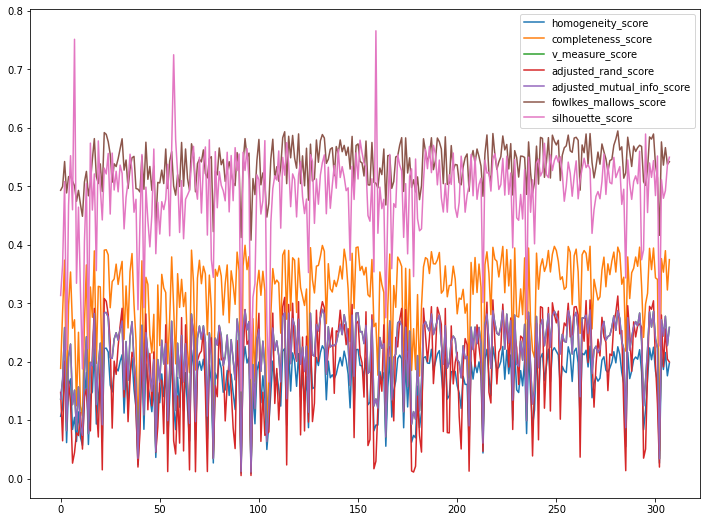

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(12,9)
for i in range(7):
    ax.plot([al[i][1] for al in all_metrics], label=all_metrics[0][i][0])
ax.legend()
plt.show()

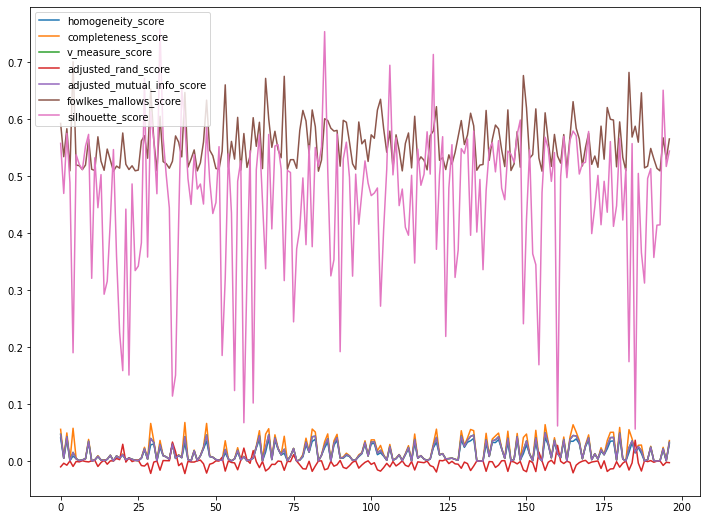

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(12,9)
for i in range(7):
    ax.plot([al[i][1] for al in all_metrics], label=all_metrics[0][i][0])
ax.legend()
plt.show()

 2 < t < 7

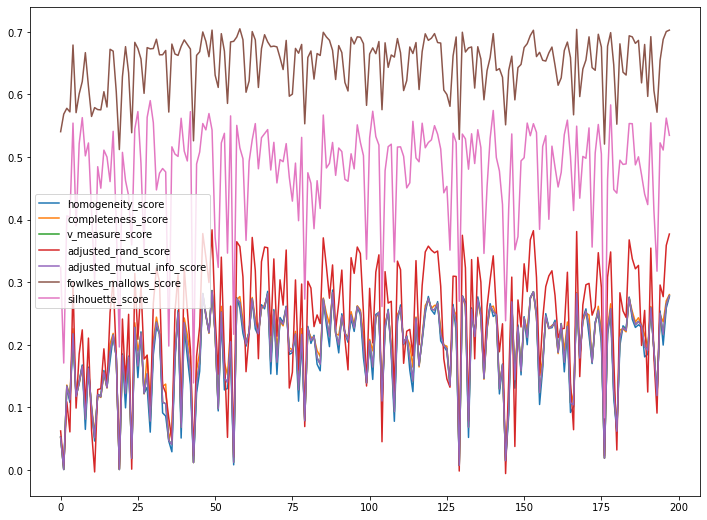

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(12,9)
for i in range(7):
    ax.plot([al[i][1] for al in all_metrics], label=all_metrics[0][i][0])
ax.legend()
plt.show()

In [33]:
print(axc.generation_strategy.trials_as_df)
render(axc.get_optimization_trace())

[INFO 04-23 13:32:03] ax.modelbridge.generation_strategy: Note that parameter values in dataframe are rounded to 2 decimal points; the values in the dataframe are thus not the exact ones suggested by Ax in trials.


     Generation Step Generation Model  Trial Index Trial Status  \
0                  0            Sobol            0    COMPLETED   
1                  0            Sobol            1    COMPLETED   
2                  0            Sobol            2    COMPLETED   
3                  0            Sobol            3    COMPLETED   
4                  0            Sobol            4    COMPLETED   
..               ...              ...          ...          ...   
307                1             GPEI          307    COMPLETED   
308                1             GPEI          308    COMPLETED   
309                1             GPEI          309    COMPLETED   
310                1             GPEI          310    COMPLETED   
311                1             GPEI          311    COMPLETED   

                                 Arm Parameterizations  
0    {'0_0': {'b': 6.43, 'c': 2.97, 'dl': 2.12, 'dh...  
1    {'1_0': {'b': 4.03, 'c': 9.74, 'dl': 1.43, 'dh...  
2    {'2_0': {'b': 1.24,

In [25]:
axc.save_to_json_file("run200_Homogeneity.json")

[INFO 04-23 00:00:06] ax.service.ax_client: Saved JSON-serialized state of optimization to `run200_Homogeneity.json`.


/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

divide by zero encountered in log10



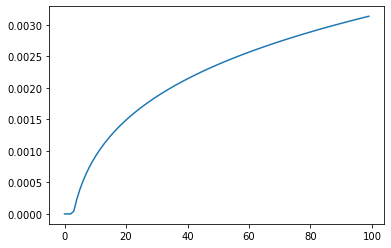

In [14]:
best_parameters, values = axc.get_best_parameters()
from astrobf.tmo import Mantiuk_Seidel
plt.plot(Mantiuk_Seidel(np.linspace(0,100,100), **best_parameters))

### !! call load() directly from module, not from ax_client instance. 

Seems like I CAN render?? 

In [37]:
loaded = AxClient.load_from_json_file("./test.json")

[INFO 04-20 14:57:43] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 2 decimal points.


In [25]:
ax_client.load_from_json_file("./Kmeans_3to7_rescale100.json")

[INFO 04-20 14:53:53] ax.modelbridge.transforms.standardize_y: Outcome total_flux is constant, within tolerance.
[INFO 04-20 14:53:53] ax.service.ax_client: Starting optimization with verbose logging. To disable logging, set the `verbose_logging` argument to `False`. Note that float values in the logs are rounded to 2 decimal points.


-- 1. Gini만 계산하면 StatMorph 보다 훨씬 빠르게 (metric 하나부터 늘려보기) 
-- 2. min/max는 각 이미지별로. -> fractional 파라미터 
-- 3. Cluster center에 있는 prototype들을 몇 개씩 뽑아서 그들의 TMO 결과가 진화하는걸 눈으로 확인. 기대하는 방향으로 가는가.
4. Center, r20, r80정보 등은 한번만 계산 해놓고 BO iteration 동안에 재활용해도 됨. 

## Prototypical samples

In [ ]:
best_parameters, values = axc.get_best_parameters()
best_results = custom_morph.step_simple_morph(all_gals, best_parameters)
add_ttype(best_results, cat)

eval_metrics, clustering = do_ML(best_results, labeler,
                                 fields=['gini', 'm20'], 
                                 return_cluster=True,
                                 cluster_method="ward")

In [18]:
# Get centroid
clu1 = best_results[clustering.labels_.astype(bool)]
clu2 = best_results[~clustering.labels_.astype(bool)]

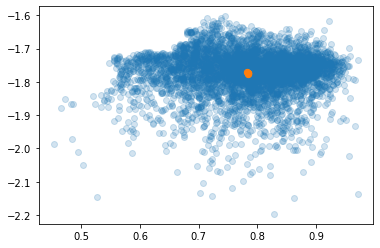

NameError: name 'all_gals' is not defined

In [19]:
tmo_params = best_parameters
typical_E = get_typical(clu1, n_samples=5)
typical_L = get_typical(clu2, n_samples=5)

/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10



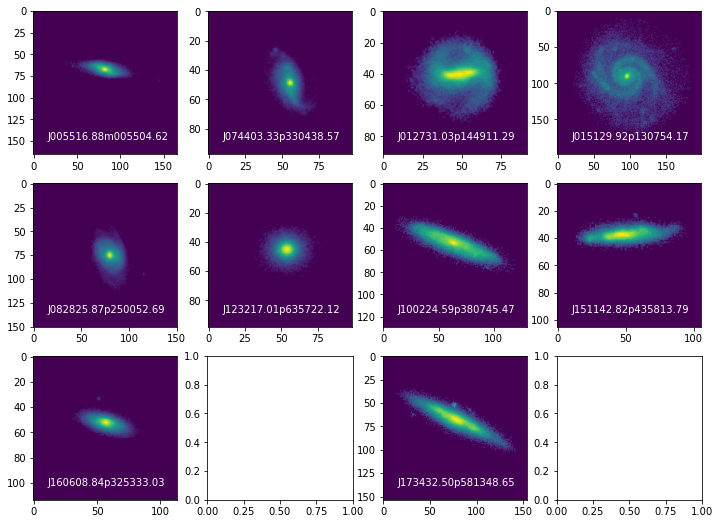

In [19]:
plot_group_comparison(typical_L, typical_E, best_parameters)

## L's and E's in incremental points 

### Get the 'incremental' points

In [20]:
trace, t_ = axc.get_optimization_trace()

scores = np.array(trace['data'][0]['y'])
i_incr = [np.argmax(sc == scores) for sc in np.unique(scores)]

incr_params = [axc.get_trial_parameters(i) for i in i_incr]

In [36]:
incr_params

[{'b': 6.902841091156006,
  'c': 0.6669564787298441,
  'dl': 0.8063844330608845,
  'dh': 2.3920428276062013},
 {'b': 3.220820091664791,
  'c': 0.975874172989279,
  'dl': 7.9246939504519105,
  'dh': 3.6204587411135436},
 {'b': 2.0424186065793037,
  'c': 6.619394096080214,
  'dl': 5.340655580628663,
  'dh': 3.347471503354609},
 {'b': 1.0328780762518686,
  'c': 4.780245242264136,
  'dl': 5.444737485998515,
  'dh': 2.5385039959690863},
 {'b': 1.0,
  'c': 6.747731018688424,
  'dl': 6.006272389311135,
  'dh': 3.983944425885529},
 {'b': 1.000000000000001,
  'c': 2.727240126145152,
  'dl': 8.0,
  'dh': 6.796956958539},
 {'b': 1.0000000000000406,
  'c': 6.455700900613314,
  'dl': 3.586476181297545,
  'dh': 5.048811433172686},
 {'b': 1.6052257871867477,
  'c': 5.620680590847523,
  'dl': 0.5000000000081105,
  'dh': 6.649056374775275},
 {'b': 1.5745241321461358,
  'c': 1.7248554273096666,
  'dl': 2.8300769396237766,
  'dh': 2.370530577206584},
 {'b': 1.606783228528012,
  'c': 1.8245239391035408,
 

/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10



Is every element matched?:  True
Label 1 samples 3869/9536


/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10



Is every element matched?:  True
Label 1 samples 3869/9536


/home/hoseung/Work/tonemap/astroBF/astrobf/tmo.py:263: RuntimeWarning:

invalid value encountered in log10



Is every element matched?:  True
Label 1 samples 3869/9536


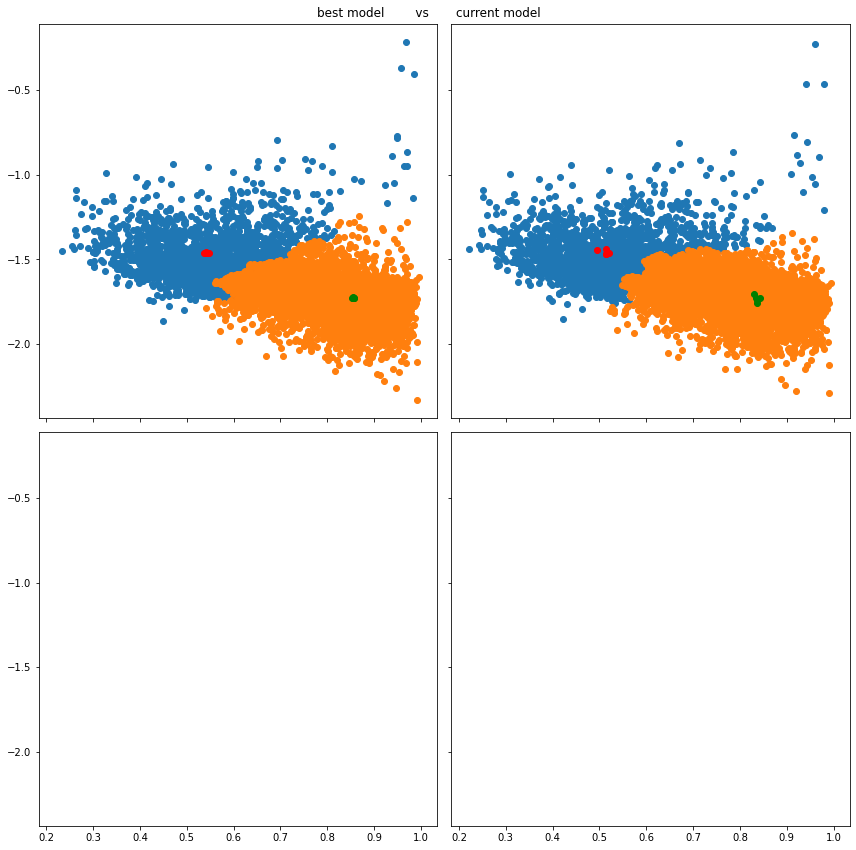

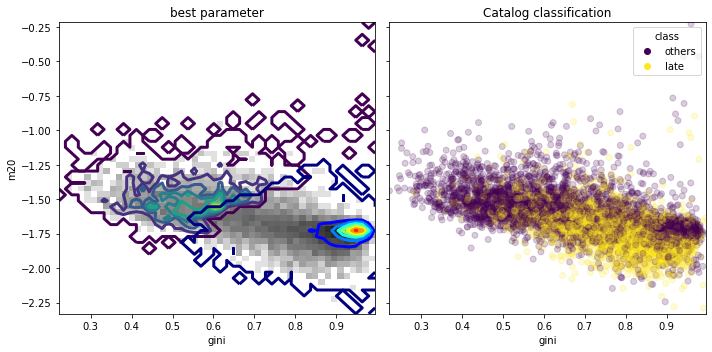

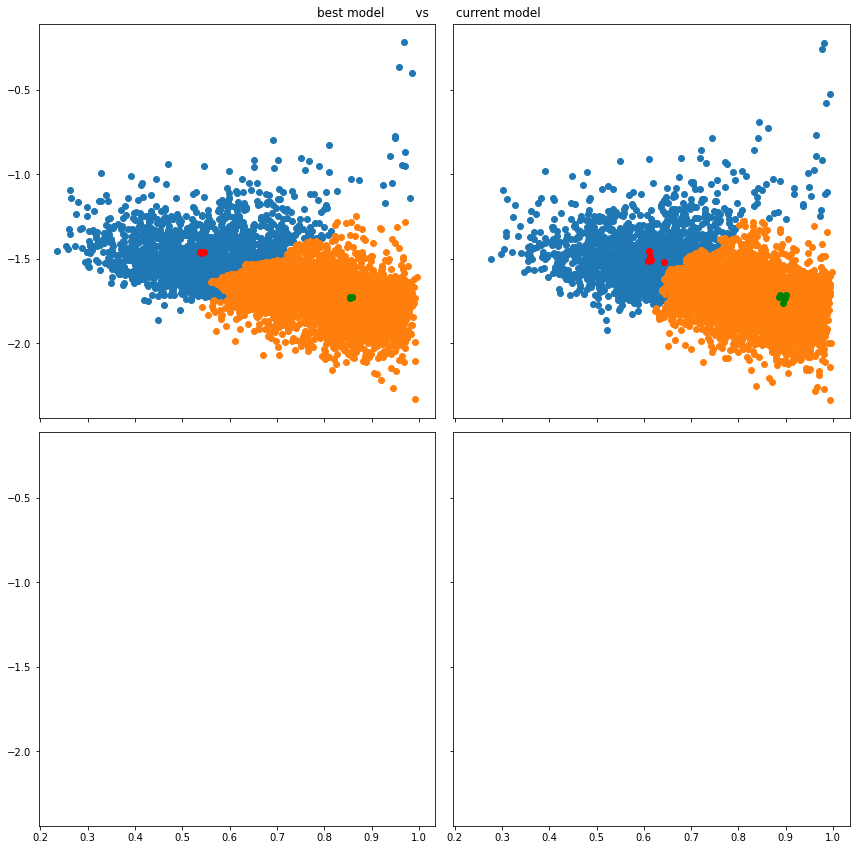

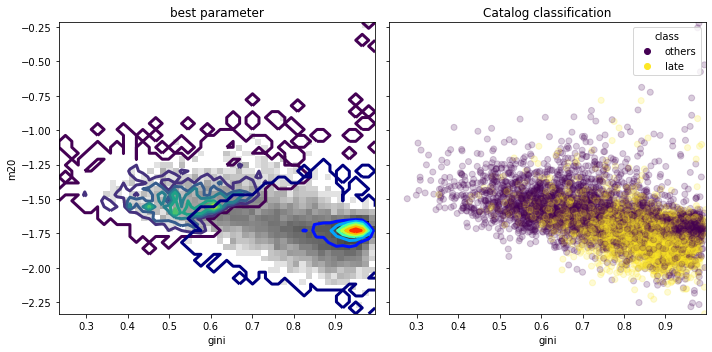

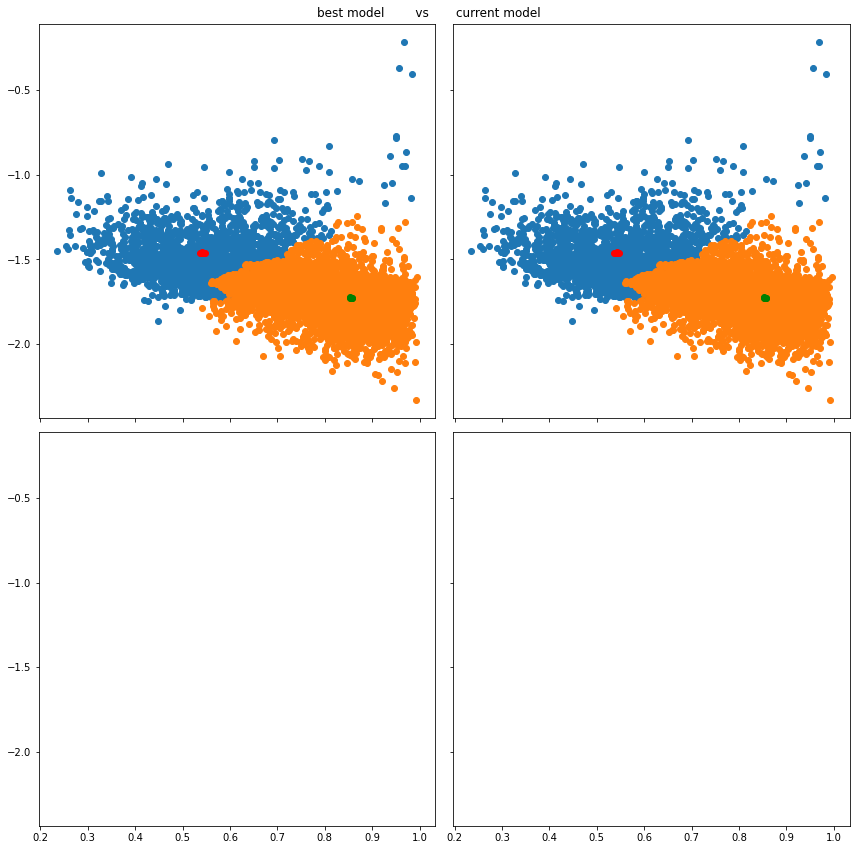

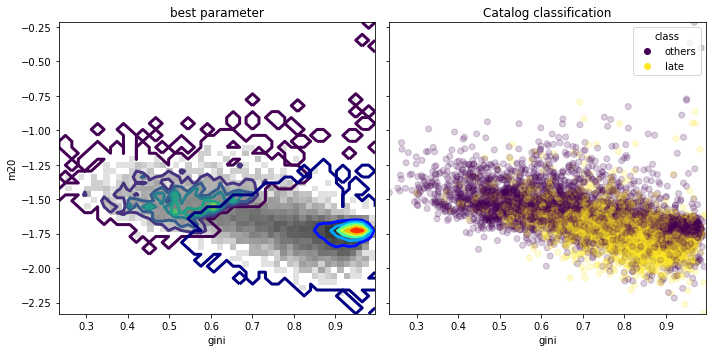

In [25]:
typical_E_result = get_matched_result(best_results, [gal['img_name'] for gal in typical_E])
typical_L_result = get_matched_result(best_results, [gal['img_name'] for gal in typical_L])

for i, params in enumerate(incr_params):
    try:
        plot_group_comparison(typical_L, typical_E, params,
                              fn=f'typical_{i}.png',
                              suptitle=f"scroe: {scores[i_incr[i]]:.4f}")


        this_results = custom_morph.step_simple_morph(all_gals, params)
        add_ttype(this_results, cat)

        eval_metrics, clustering = do_ML(this_results, labeler,
                                         fields=['gini', 'm20'], 
                                         return_cluster=True,
                                         cluster_method="ward")

        # Get centroid
        clu0_this = this_results[clustering.labels_==0]
        clu1_this = this_results[clustering.labels_==1]
        clu2_this = this_results[clustering.labels_==2]
        clu3_this = this_results[clustering.labels_==3]


        typical_E_this_result = get_matched_result(this_results, 
                                                   [gal['img_name'] for gal in typical_E])
        typical_L_this_result = get_matched_result(this_results, 
                                                   [gal['img_name'] for gal in typical_L])

        plot_group_evals_w_centers((clu1,clu2), 
                               (typical_E_result, typical_L_result),
                               (clu1_this, clu2_this), 
                               (typical_E_this_result, typical_L_this_result),
                               fn=f"G_M{i}.png")

        plot_classification_vs_answer(this_results, clu1, clu2, labeler,
                                        fn=f"current_in_best_color{i}.png")
    except:
        continue

cluster member의 T type의 Homogeniety를 고려하는 metric이 필요함.  ---> classification 으로 생각?
일단 멤버가 맞은 다음에 서로 떨어지거나/concentration이 높으면 좋겠지.

2. 적절한 metric? purity 
3. metric에 size 로 weight를 주는게 

## Train two sets of parameters for early / late samples.